<a href="https://colab.research.google.com/github/duhajarrar/FraudDetectionMLProject/blob/master/tryML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description of Data

In [60]:
import pandas as pd
import math 
datafile=pd.read_csv('/content/drive/My Drive/creditcard.csv')
print("(Records , Columns ) :",datafile.shape)
print("Columns :")
print(datafile.columns)

(Records , Columns ) : (284807, 31)
Columns :
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [61]:
print("Count of non null records in Columns :")
datafile.info()

Count of non null records in Columns :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     2

In [62]:
print(datafile.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Data Visualization






> Amount Vs Fraud


Text(0.5, 0, 'Fraud')

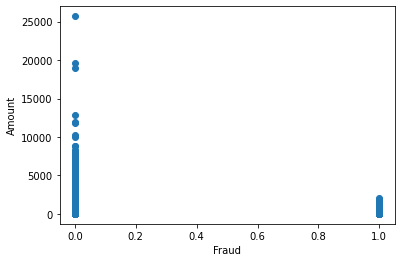

In [63]:
import matplotlib.pyplot as plt
plt.scatter(datafile['Class'],datafile['Amount']) # fraud value 1 
plt.ylabel('Amount')
plt.xlabel('Fraud') 

* As we see from above plot we can say that the most frauds cases has been with small amount 

let's count the number of frauds records and calculate the percentage of frauds of the dataset

In [64]:
Fraud=datafile[datafile['Class']==1]
f=Fraud['Class'].count()
print("Number of records Fraud : ",f)

Number of records Fraud :  492


In [65]:
NotFraud=datafile[datafile['Class']==0]
nf=NotFraud['Class'].count()
print("Number of records Not Fraud : ",nf)

Number of records Not Fraud :  284315


In [66]:
PersOfFrauds=(f/(f+nf))*100
print("Percentage of Fraud records : ",PersOfFrauds,"%")


Percentage of Fraud records :  0.1727485630620034 %


# **The effect of every column on Fraud**

In [67]:

datafile.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**We can conclude that Fraud cases depended on : V1 - V2**



# Decision Trees 


In [0]:
pd.crosstab(datafile.V1,datafile.Class).plot(kind='bar')